Problem Statement:   
Detect fake news articles based on text content,subject, and metadata

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
from wordcloud import WordCloud
from collections import Counter
import string

In [4]:
#loading dataset
fake_df=pd.read_csv('data/Fake.csv')
real_df=pd.read_csv('data/True.csv')

In [5]:
fake_df['label']=0
real_df['label']=1

In [6]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [7]:
real_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df=pd.concat([fake_df,real_df], axis=0, ignore_index=True)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df.tail()

,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(209)

In [12]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [14]:
df.nunique()

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

In [15]:
df.describe()

,label
count,44689.000000
mean,0.474636
std,0.499362
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Exploring data

In [16]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [17]:
print("Categories in 'subject' variable ", end=" ")
print(df['subject'].unique())

print("Categories in 'label' variable ", end=" ")
print(df['label'].unique())

Categories in 'subject' variable  ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']
Categories in 'label' variable  [0 1]


In [18]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f"We have {len(numeric_features)} numeric features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 1 numeric features : ['label']
We have 4 categorical features : ['title', 'text', 'subject', 'date']


In [19]:
#comparing text length for fake and real news
df['text_length']=df['text'].apply(lambda x: len(str(x)))
df['title_length']=df['title'].apply(lambda x: len(str(x)))
df['word_count']=df['text'].apply(lambda x: len(str(x).split()))
df

,title,text,subject,date,label,text_length,title_length,word_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,420
...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,2821,61,466
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,800,52,125
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1950,49,320
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1199,61,205


In [20]:
#comparing punctuations for fake and real news
df['punct_count']=df['text'].apply(lambda x: sum([1 for c in str(x) if c in string.punctuation]))
df['punct_density']=df['punct_count']/df['text_length']
df

,title,text,subject,date,label,text_length,title_length,word_count,punct_count,punct_density
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495,121,0.041825
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305,39,0.020548
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,580,148,0.041145
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,444,118,0.042538
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,420,40,0.017050
...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,2821,61,466,71,0.025168
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,800,52,125,18,0.022500
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1950,49,320,48,0.024615
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1199,61,205,21,0.017515


In [21]:
#checking for capital letter density difference between real and fake news
df['capital_count']=df['text'].apply(lambda x: sum([1 for c in str(x) if c.isupper()]))
df['capital_density']=df['capital_count']/df['text_length']
df

,title,text,subject,date,label,text_length,title_length,word_count,punct_count,punct_density,capital_count,capital_density
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495,121,0.041825,138,0.047701
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305,39,0.020548,88,0.046365
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,580,148,0.041145,308,0.085627
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,444,118,0.042538,123,0.044340
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,420,40,0.017050,63,0.026854
...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,2821,61,466,71,0.025168,116,0.041120
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,800,52,125,18,0.022500,39,0.048750
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1950,49,320,48,0.024615,54,0.027692
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1199,61,205,21,0.017515,55,0.045872


In [22]:
#checking numeric character count
df['numeric_count']=df['text'].apply(lambda x: sum([1 for c in str(x) if c.isdigit()]))
df

,title,text,subject,date,label,text_length,title_length,word_count,punct_count,punct_density,capital_count,capital_density,numeric_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495,121,0.041825,138,0.047701,110
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305,39,0.020548,88,0.046365,4
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,580,148,0.041145,308,0.085627,99
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,444,118,0.042538,123,0.044340,75
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,420,40,0.017050,63,0.026854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,2821,61,466,71,0.025168,116,0.041120,23
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,800,52,125,18,0.022500,39,0.048750,4
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1950,49,320,48,0.024615,54,0.027692,14
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1199,61,205,21,0.017515,55,0.045872,6


In [23]:
#checking average word length
df['avg_word_length']=df.apply(lambda row: row['text_length']/row['word_count'] if row['word_count']>0 else 0, axis=1)
df

,title,text,subject,date,label,text_length,title_length,word_count,punct_count,punct_density,capital_count,capital_density,numeric_count,avg_word_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495,121,0.041825,138,0.047701,110,5.844444
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305,39,0.020548,88,0.046365,4,6.222951
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,580,148,0.041145,308,0.085627,99,6.201724
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,444,118,0.042538,123,0.044340,75,6.247748
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,420,40,0.017050,63,0.026854,0,5.585714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,2821,61,466,71,0.025168,116,0.041120,23,6.053648
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,800,52,125,18,0.022500,39,0.048750,4,6.400000
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1950,49,320,48,0.024615,54,0.027692,14,6.093750
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1199,61,205,21,0.017515,55,0.045872,6,5.848780


In [24]:
print(f"Shortest article: {df['text_length'].min()} characters")
print(f"Longest article: {df['text_length'].max()} characters")
print(f"Average article length: {df['text_length'].mean():.0f} characters")


Shortest article: 1 characters
Longest article: 51794 characters
Average article length: 2467 characters


Univariate analysis

Text(0, 0.5, '')

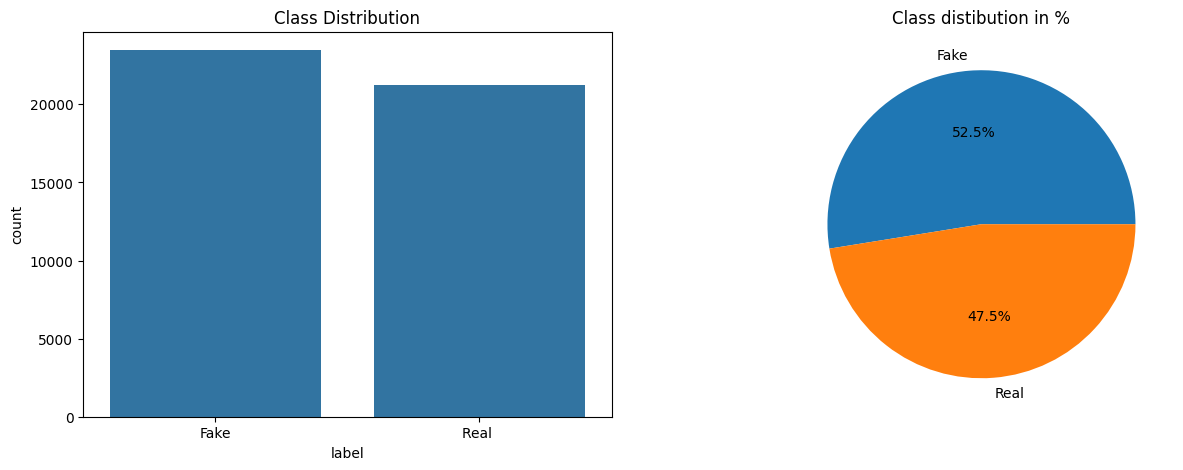

In [25]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='label')
plt.xticks([0,1],['Fake','Real '])
plt.title('Class Distribution')

plt.subplot(1,2,2)
df['label'].value_counts().plot(kind='pie',labels=['Fake','Real'],autopct='%1.1f%%')
plt.title('Class distibution in %')
plt.ylabel('')

Observation:  
There is more fake news than real news

Text(0.5, 1.0, 'Word count distribution')

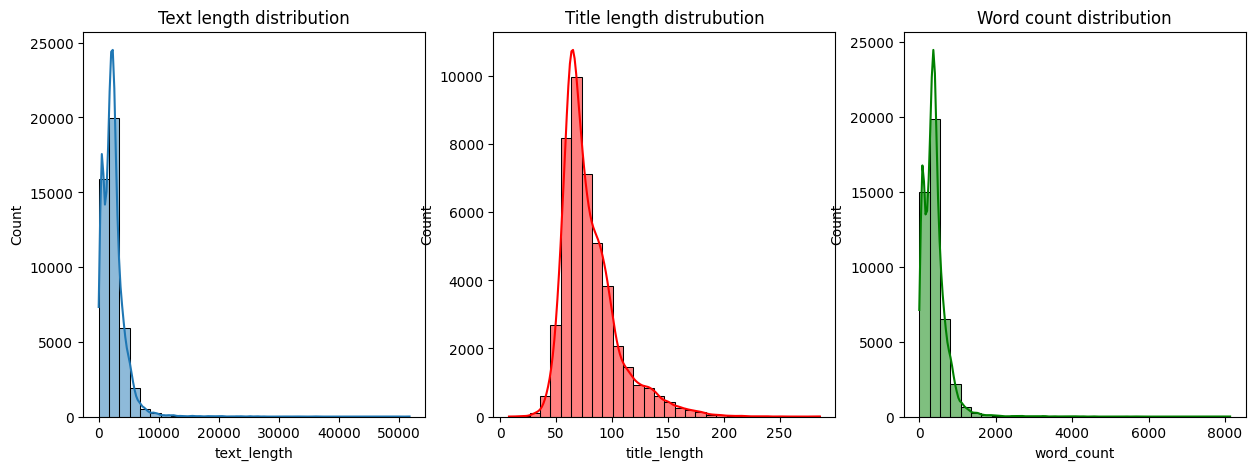

In [26]:
#text length distribution
fig,axs= plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='text_length', kde=True, bins=30)
plt.title('Text length distribution')

plt.subplot(1,3,2)
sns.histplot(data=df, x='title_length', kde=True, bins=30, color='red')
plt.title('Title length distrubution')

plt.subplot(1,3,3)
sns.histplot(data=df, x='word_count', kde=True, bins=30, color='green')
plt.title('Word count distribution')

Observation:  
Text length, title length and word count is left skewed

Text(0.5, 0, 'Count')

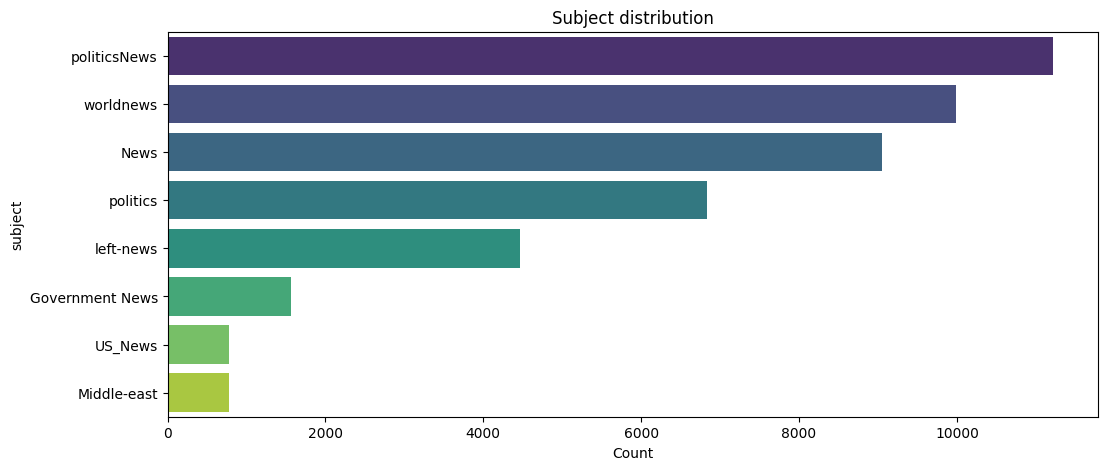

In [27]:
#subject distribution
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index, palette='viridis')
plt.title('Subject distribution')
plt.xlabel('Count')

Observation:  
Maximum news is about politics followed by world news, and the least amount of news is about the middle-east

Bivariate analysis

Text(0.5, 1.0, 'Capital letter density by label')

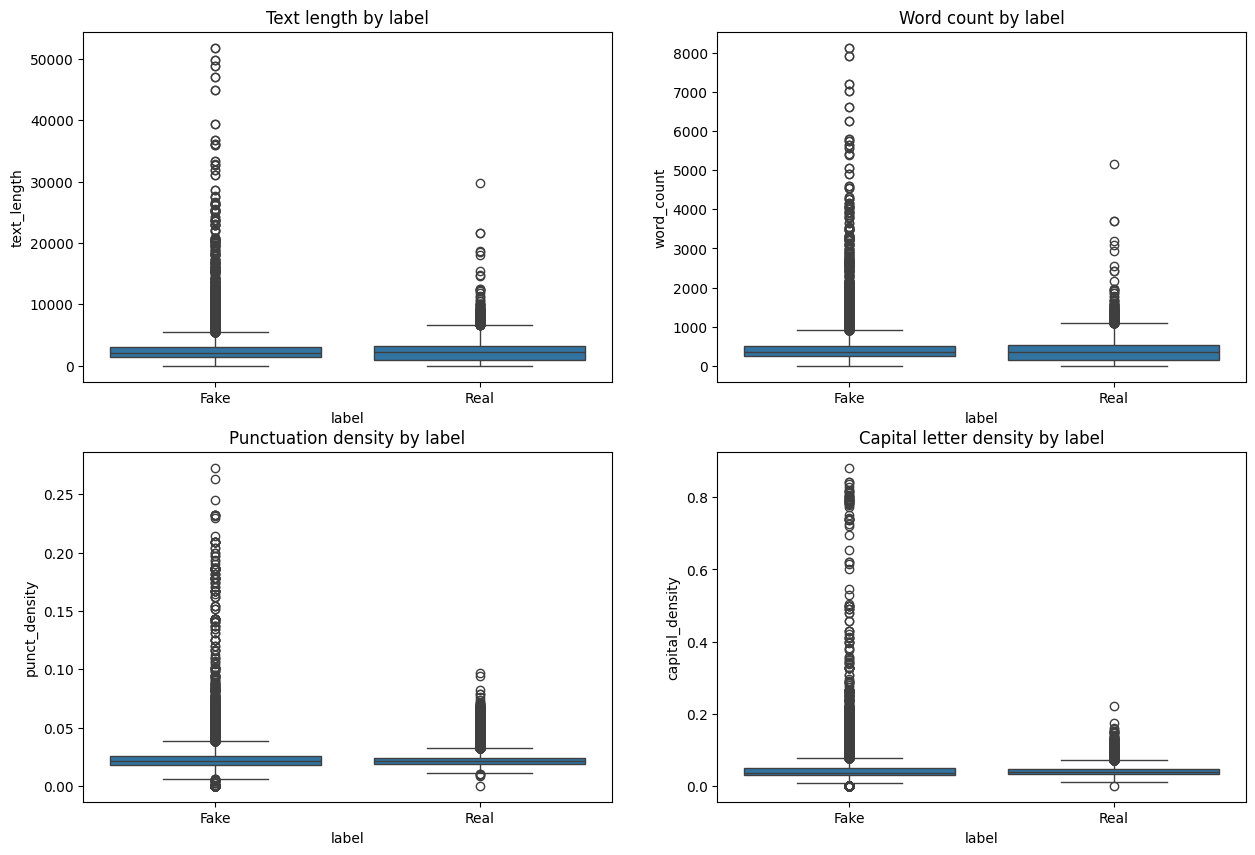

In [28]:
fig, axs= plt.subplots(2,2, figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=df, x='label', y='text_length')
plt.xticks([0,1],['Fake','Real'])
plt.title('Text length by label')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='label',y='word_count')
plt.xticks([0,1],['Fake','Real'])
plt.title('Word count by label')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='label',y='punct_density')
plt.xticks([0,1],['Fake','Real'])
plt.title('Punctuation density by label')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='label',y='capital_density')
plt.xticks([0,1],['Fake','Real'])
plt.title('Capital letter density by label')

Observation:  
(1) Text and word count is more for Fake news.  
(2) Punctuation and capital letter density is more for fake news, to attract public attention to fake stories.  

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Government News'),
  Text(1, 0, 'Middle-east'),
  Text(2, 0, 'News'),
  Text(3, 0, 'US_News'),
  Text(4, 0, 'left-news'),
  Text(5, 0, 'politics'),
  Text(6, 0, 'politicsNews'),
  Text(7, 0, 'worldnews')])

<Figure size 1200x600 with 0 Axes>

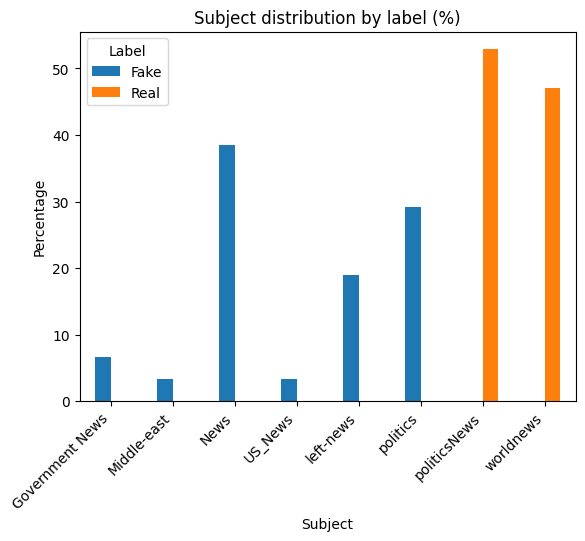

In [29]:
#subject by label

plt.figure(figsize=(12,6))
subject_label=pd.crosstab(df['subject'], df['label'], normalize='columns') * 100
subject_label.plot(kind='bar')
plt.title('Subject distribution by label (%)')
plt.xlabel('Subject')
plt.ylabel('Percentage')
plt.legend(['Fake', 'Real'], title='Label')
plt.xticks(rotation=45, ha='right')

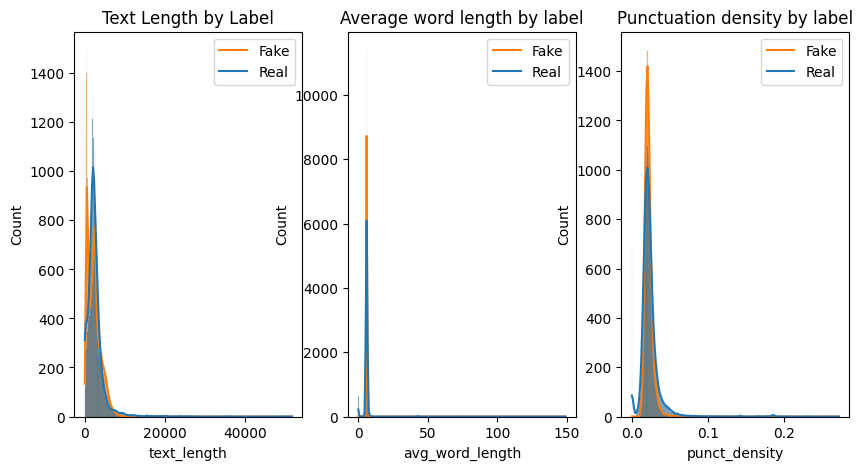

In [30]:
#text characteristics comparison
fig, axs= plt.subplots(1,3, figsize=(10,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='text_length', hue='label',kde=True)
plt.title('Text Length by Label')
plt.legend(['Fake','Real'])

plt.subplot(1,3,2)
sns.histplot(data=df, x='avg_word_length', hue='label', kde=True)
plt.title('Average word length by label')
plt.legend(['Fake','Real'])

plt.subplot(1,3,3)
sns.histplot(data=df, x='punct_density', hue='label', kde=True)
plt.title('Punctuation density by label')
plt.legend(['Fake','Real'])

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

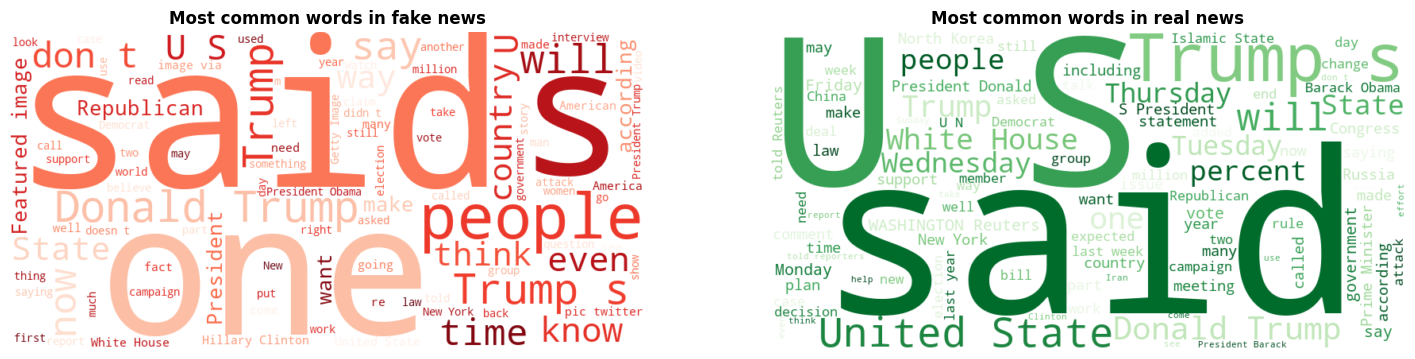

In [31]:
#word clouds
fake_text=' '.join(df[df['label']==0]['text'].astype(str))
real_text=' '.join(df[df['label']==1]['text'].astype(str))

fig, axs= plt.subplots(1,2, figsize=(18,6))

plt.subplot(1,2,1)
wc_fake=WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=100).generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title('Most common words in fake news', fontweight='bold')
plt.axis('off')

plt.subplot(1,2,2)
wc_real=WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=100).generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.title('Most common words in real news', fontweight='bold')
plt.axis('off')

Multivariate analysis

<Axes: >

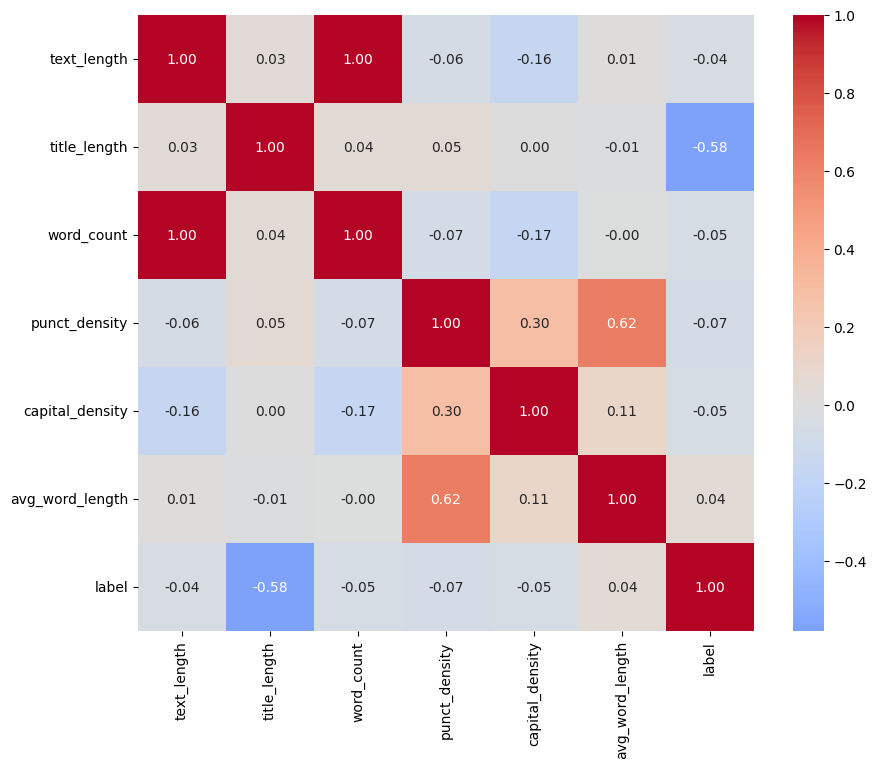

In [32]:
#correlation matrix
numeric_features=['text_length','title_length','word_count','punct_density','capital_density','avg_word_length','label']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)

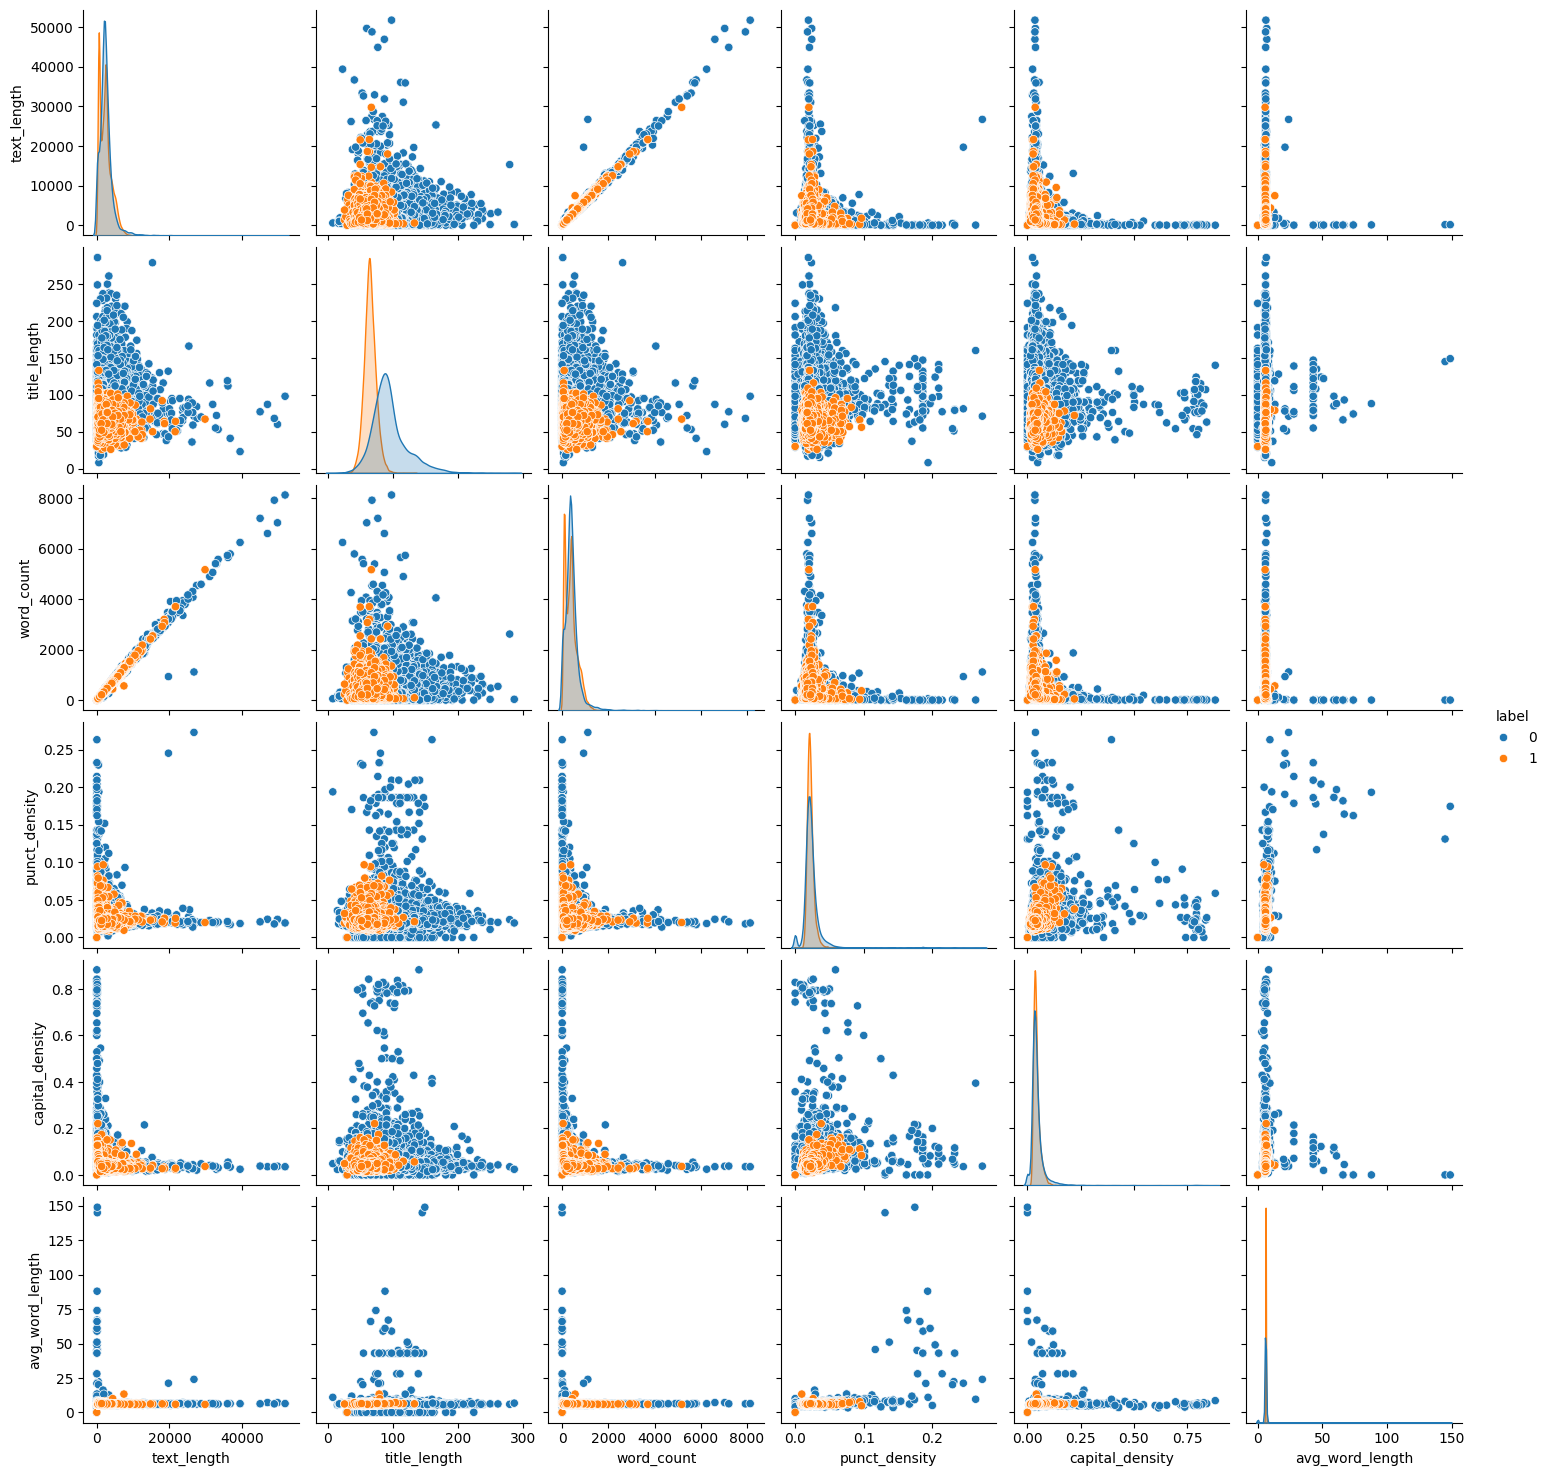

In [33]:
sns.pairplot(df[numeric_features],hue='label')

In [34]:
df.to_csv('data/processed_data.csv', index=False)